In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [23]:
df=pd.read_csv('SalesPred.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [25]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [24]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [9]:
import seaborn as sns

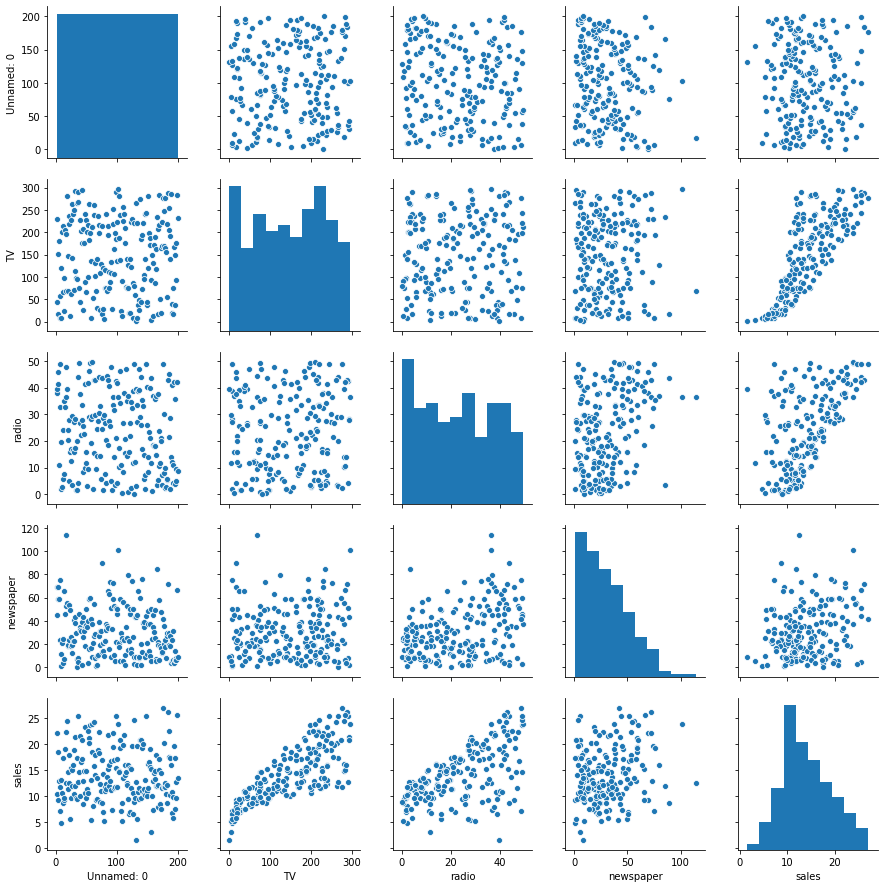

In [12]:
sns.pairplot(df)

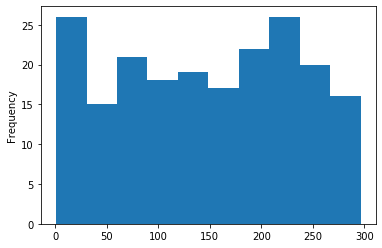

In [13]:
df['TV'].plot.hist()

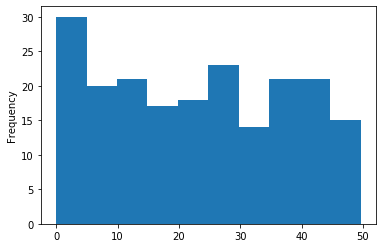

In [14]:
df['radio'].plot.hist()

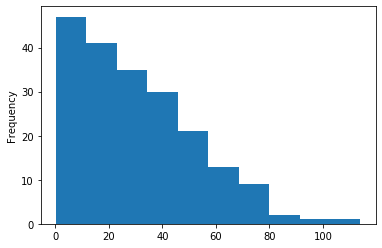

In [26]:
df['newspaper'].plot.hist()

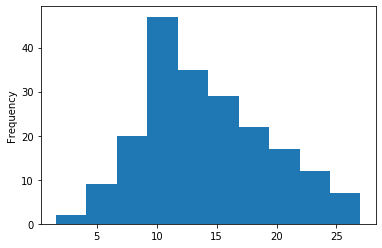

In [16]:
df['sales'].plot.hist()

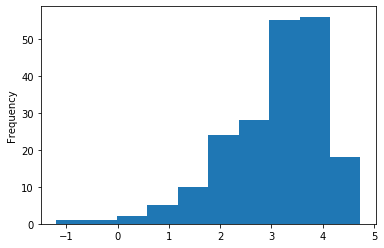

In [27]:
np.log(df['newspaper']).plot.hist()

In [28]:
df['newspaper']=np.log(df['newspaper'])

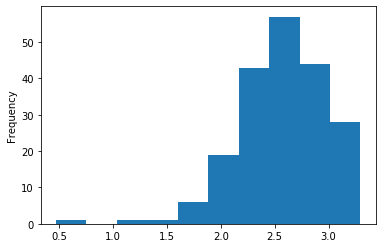

In [29]:
np.log(df['sales']).plot.hist()

In [30]:
df['sales']=np.log(df['sales'])

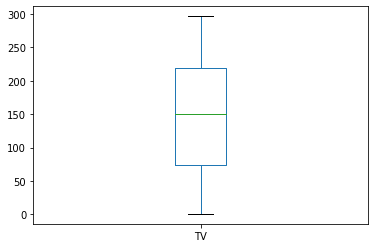

In [31]:
df['TV'].plot.box()

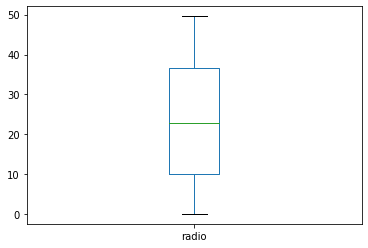

In [32]:
df['radio'].plot.box()

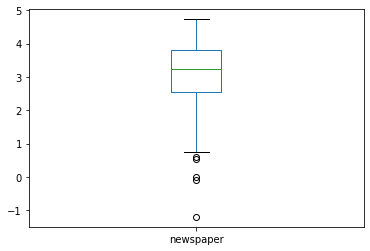

In [33]:
df['newspaper'].plot.box()

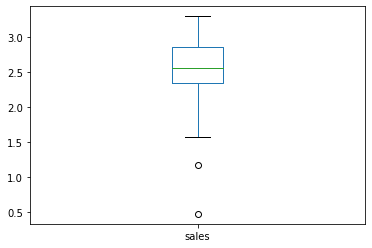

In [34]:
df['sales'].plot.box()

First Quartile 2.646098621496201
Second Quartile 3.2484176600955044
Third Quartile 3.8088822465086327
Fourth Quartile 4.736198448394496
1.1627836250124317
LR= 0.9019231839775534
UR= 5.55305768402728


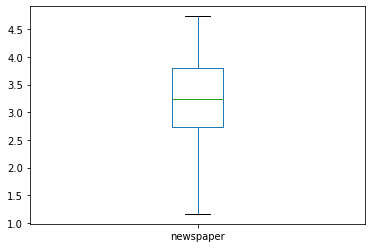

In [36]:
#Removing Outliers in the variables data. Discarding the values above UR and below LR.

Q1=df['newspaper'].quantile(0.25)
Q2=df['newspaper'].quantile(0.50)
Q3=df['newspaper'].quantile(0.75)
Q4=df['newspaper'].quantile(1)
print("First Quartile",Q1)
print("Second Quartile",Q2)
print("Third Quartile",Q3)
print("Fourth Quartile",Q4)
IQR=Q3-Q1
print(IQR)
LR=Q1-1.5*IQR
UR=Q3+1.5*IQR
print('LR=',LR)
print('UR=',UR)
df.loc[df['newspaper']<=LR,'newspaper']=np.mean(df['newspaper'])

#Verifying
df['newspaper'].plot.box()

First Quartile 2.34898289440944
Second Quartile 2.5606090142993736
Third Quartile 2.856470206220483
Fourth Quartile 3.295836866004329
0.507487311811043
LR= 1.5877519266928757
UR= 3.6177011739370477


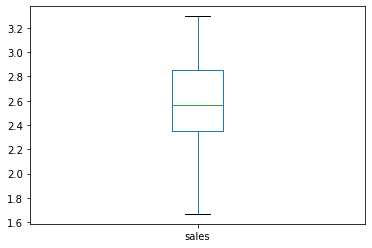

In [38]:
Q1=df['sales'].quantile(0.25)
Q2=df['sales'].quantile(0.50)
Q3=df['sales'].quantile(0.75)
Q4=df['sales'].quantile(1)
print("First Quartile",Q1)
print("Second Quartile",Q2)
print("Third Quartile",Q3)
print("Fourth Quartile",Q4)
IQR=Q3-Q1
print(IQR)
LR=Q1-1.5*IQR
UR=Q3+1.5*IQR
print('LR=',LR)
print('UR=',UR)
df.loc[df['sales']<=LR,'sales']=np.mean(df['sales'])

#Verifying
df['sales'].plot.box()

In [39]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.206612,-0.054375
TV,0.017715,1.000000,0.054809,0.011620,0.783782
radio,-0.110680,0.054809,1.000000,0.269031,0.529406
newspaper,-0.206612,0.011620,0.269031,1.000000,0.094945
sales,-0.054375,0.783782,0.529406,0.094945,1.000000


In [40]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,3.189003,2.586529
std,57.879185,85.854236,14.846809,0.775518,0.366475
min,1.000000,0.700000,0.000000,1.163151,1.667707
25%,50.750000,74.375000,9.975000,2.734110,2.351375
50%,100.500000,149.750000,22.900000,3.248418,2.563991
75%,150.250000,218.825000,36.525000,3.808882,2.856470
max,200.000000,296.400000,49.600000,4.736198,3.295837


In [42]:
#Separating the data into input and target variable

x=df.drop(['sales','Unnamed: 0'],axis=1)
y=df['sales']
x.shape,y.shape

((200, 3), (200,))

In [43]:
#Feauture Scaling using MinMaxScaler technique

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [44]:
#Storing the scaled data in a dataframe

x=pd.DataFrame(x_scaled,columns=x.columns)

In [45]:
#Verifying the scaled data

x.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.860288
1,0.148123,0.792339,0.740469
2,0.055800,0.925403,0.860692
3,0.509976,0.832661,0.813277
4,0.609063,0.217742,0.812798


In [46]:
#Splitting the data into train set and test set using random state = 56 and test size = 0.25.

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=56,test_size=0.25)

In [53]:
from sklearn.linear_model import LinearRegression

In [59]:
#Creating an instance for Linear Regression model as lr.

lr=LinearRegression()

#Fitting the model on train data

lr.fit(train_x,train_y)

#Below output shows the default values of hyperparameters of the Linear Regression model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#Finding the coefficients of the Linear Regression model.

lr.coef_

array([ 0.94896451,  0.622354  , -0.10756587])

In [57]:
#Finding the intercepts of the Linear Regression model.

lr.intercept_

1.8898584614747318

In [60]:
#Importing the GridSearchCV for searching the best values of hyperparameters of the Linear Regression model.

from sklearn.model_selection import GridSearchCV

In [61]:
#Creating an instance for the Linear Regression model.

lr=LinearRegression()

In [62]:
#Importing the cross_val_score for the cross validation technique to avoid overfitting and underfitting issues.
#Importing the cross_val_predict to find the predictions of the cross validation techniquw.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

In [69]:
#Finding the mean and the standard deviation of the cross_val_score for the model at some random cv value.

score=cross_val_score(lr,x,y,cv=5)
print('Score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

Score: [0.74732579 0.86543064 0.92439807 0.76441005 0.91057917]
Mean Scores 0.8424287454028325
Standard deviation 0.07351738057677065


In [70]:
#Defining the function Val_score() to check the mean and standard deviation of the cross validation score at different values of cv.

def Val_score(k):
    avg=[]
    std=[]
    for i in k:
        score=cross_val_score(lr,X=train_x,y=train_y,cv=i)
        avg.append(score.mean())
        std.append(score.std())
        return avg, std

In [71]:
#Finding the mean and standard deviation of the cross validation score using the user defined function Val_Score to check cv score for a value of cv which falls in the ideal range of 5 to 10.

k=range(5,10)
mean,std=Val_score(k)

In [72]:
#Storing the different values of mean and standard deviation of the cross val score at different values of cv in a data frame.

score=pd.DataFrame({'Avg_cv_score':mean,'Std_cv_score':std},index=k)
score

,Avg_cv_score,Std_cv_score
5,0.804324,0.121349
6,0.804324,0.121349
7,0.804324,0.121349
8,0.804324,0.121349
9,0.804324,0.121349


In [76]:
#We can see that at cv=5 we get the maximum cross validation score i.e.0.8424287454028325. 
#We will define the grid parameters of Linear Regression model for the grid search cv technique.
grid_params={
    'copy_X':[True,False],
    'fit_intercept':[True,False],
    'normalize':[True,False]

}

In [77]:
#We will define the model GridSearchCV by giving the parameters estimator = model, param_grid=grid parameters,scoring= r2_score, cv value and n_jobs = -1 to enable all processors to run for smooth output.

grid_search=GridSearchCV(estimator=lr,
                        param_grid=grid_params,
                        cv=5,
                        n_jobs=-1)

In [78]:
#Use the GridSearchCV on the train data to find the best values of the hyperparameters of Linear Regression model.

grid_search=grid_search.fit(train_x,train_y)

In [79]:
best_parameters=grid_search.best_params_

print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [80]:
best_result=grid_search.best_score_
print(best_result)

0.8043236740301636


In [81]:
lr=LinearRegression(copy_X=True,fit_intercept=True,normalize=True)

In [93]:
score=cross_val_score(lr,x,y,cv=5)

In [94]:
print('Cross Val Score =',score)
print('Cross Val Score Mean Scores = ',score.mean())
print('Cross Val Score Standard deviation = ',score.std())

y_pred=cross_val_predict(lr,x,y,cv=5)
print('Y Prediction values')
print(y_pred)

from sklearn.metrics import accuracy_score
score1=r2_score(y,y_pred)
print('Accuracy Score Mean =',score1.mean())

Cross Val Score = [0.74732579 0.86543064 0.92439807 0.76441005 0.91057917]
Cross Val Score Mean Scores =  0.8424287454028325
Cross Val Score Standard deviation =  0.07351738057677076
Y Prediction values
[3.02499786 2.43878085 2.42366372 2.81293538 2.52164667 2.43210934
 2.41241581 2.46631024 1.86147066 2.50090425 2.09655576 2.85682656
 2.3090475  2.24822193 2.88496862 3.04172261 2.4624859  3.22206097
 2.29967576 2.60048875 2.8630273  2.6550238  2.03538433 2.77289976
 2.17627803 2.72285323 2.66320362 2.81215682 2.97333543 2.23058077
 3.12150892 2.38949683 2.14031061 2.93967077 2.1627778  2.83950014
 3.27701994 2.66700608 2.27888996 3.03259252 2.73893188 2.79508769
 3.09882786 2.58143909 2.22418604 2.65659668 2.22963952 3.11054584
 2.72216078 2.18094735 2.48583225 2.31548856 3.02149032 2.96385852
 3.02455103 3.05426513 2.20042315 2.51009549 3.10511825 2.8853938
 2.03023911 3.16535816 2.77072657 2.55436507 2.7787087  2.17018091
 2.24525586 2.47233114 2.93877079 3.05976153 2.82823287 2.350

In [95]:
#We will use cv=5 for which we are getting the maximum Cross Val Score = 0.8424287454028325 and Maximum Accuracy Score = 0.8459955109137638. 

y_pred

array([3.02499786, 2.43878085, 2.42366372, 2.81293538, 2.52164667,
       2.43210934, 2.41241581, 2.46631024, 1.86147066, 2.50090425,
       2.09655576, 2.85682656, 2.3090475 , 2.24822193, 2.88496862,
       3.04172261, 2.4624859 , 3.22206097, 2.29967576, 2.60048875,
       2.8630273 , 2.6550238 , 2.03538433, 2.77289976, 2.17627803,
       2.72285323, 2.66320362, 2.81215682, 2.97333543, 2.23058077,
       3.12150892, 2.38949683, 2.14031061, 2.93967077, 2.1627778 ,
       2.83950014, 3.27701994, 2.66700608, 2.27888996, 3.03259252,
       2.73893188, 2.79508769, 3.09882786, 2.58143909, 2.22418604,
       2.65659668, 2.22963952, 3.11054584, 2.72216078, 2.18094735,
       2.48583225, 2.31548856, 3.02149032, 2.96385852, 3.02455103,
       3.05426513, 2.20042315, 2.51009549, 3.10511825, 2.8853938 ,
       2.03023911, 3.16535816, 2.77072657, 2.55436507, 2.7787087 ,
       2.17018091, 2.24525586, 2.47233114, 2.93877079, 3.05976153,
       2.82823287, 2.35044617, 2.34154426, 2.30289956, 2.82344

In [96]:
y_pred

array([3.02499786, 2.43878085, 2.42366372, 2.81293538, 2.52164667,
       2.43210934, 2.41241581, 2.46631024, 1.86147066, 2.50090425,
       2.09655576, 2.85682656, 2.3090475 , 2.24822193, 2.88496862,
       3.04172261, 2.4624859 , 3.22206097, 2.29967576, 2.60048875,
       2.8630273 , 2.6550238 , 2.03538433, 2.77289976, 2.17627803,
       2.72285323, 2.66320362, 2.81215682, 2.97333543, 2.23058077,
       3.12150892, 2.38949683, 2.14031061, 2.93967077, 2.1627778 ,
       2.83950014, 3.27701994, 2.66700608, 2.27888996, 3.03259252,
       2.73893188, 2.79508769, 3.09882786, 2.58143909, 2.22418604,
       2.65659668, 2.22963952, 3.11054584, 2.72216078, 2.18094735,
       2.48583225, 2.31548856, 3.02149032, 2.96385852, 3.02455103,
       3.05426513, 2.20042315, 2.51009549, 3.10511825, 2.8853938 ,
       2.03023911, 3.16535816, 2.77072657, 2.55436507, 2.7787087 ,
       2.17018091, 2.24525586, 2.47233114, 2.93877079, 3.05976153,
       2.82823287, 2.35044617, 2.34154426, 2.30289956, 2.82344

In [97]:
M1Pred=[3.02499786, 2.43878085, 2.42366372, 2.81293538, 2.52164667,
       2.43210934, 2.41241581, 2.46631024, 1.86147066, 2.50090425,
       2.09655576, 2.85682656, 2.3090475 , 2.24822193, 2.88496862,
       3.04172261, 2.4624859 , 3.22206097, 2.29967576, 2.60048875,
       2.8630273 , 2.6550238 , 2.03538433, 2.77289976, 2.17627803,
       2.72285323, 2.66320362, 2.81215682, 2.97333543, 2.23058077,
       3.12150892, 2.38949683, 2.14031061, 2.93967077, 2.1627778 ,
       2.83950014, 3.27701994, 2.66700608, 2.27888996, 3.03259252,
       2.73893188, 2.79508769, 3.09882786, 2.58143909, 2.22418604,
       2.65659668, 2.22963952, 3.11054584, 2.72216078, 2.18094735,
       2.48583225, 2.31548856, 3.02149032, 2.96385852, 3.02455103,
       3.05426513, 2.20042315, 2.51009549, 3.10511825, 2.8853938 ,
       2.03023911, 3.16535816, 2.77072657, 2.55436507, 2.7787087 ,
       2.17018091, 2.24525586, 2.47233114, 2.93877079, 3.05976153,
       2.82823287, 2.35044617, 2.34154426, 2.30289956, 2.8234439 ,
       2.40826365, 1.94540638, 2.58272923, 2.25375838, 2.29409726,
       2.39278461, 2.64615007, 2.30265673, 2.56428215, 3.02348995,
       2.6465757 , 2.41134358, 2.64042366, 2.38381133, 2.7286633 ,
       2.34893382, 1.92636297, 2.90887862, 3.04747753, 2.36413439,
       2.71117389, 2.5526766 , 2.68118373, 3.25314885, 2.74281195,
       2.58300483, 3.1847758 , 2.86509351, 2.65182013, 3.05380946,
       2.80025218, 2.03014405, 2.12465085, 1.86972286, 3.02142239,
       2.63679422, 3.06730615, 2.58288682, 2.7778081 , 2.62454709,
       2.46253249, 2.44771579, 2.09743109, 2.63933562, 2.07916991,
       2.60200805, 2.14453221, 2.5743356 , 2.66417721, 2.94586438,
       2.24828916, 2.32751374, 2.09305342, 3.17939127, 2.15437488,
       2.34231446, 2.69583239, 2.19352491, 2.93818591, 2.41245965,
       2.58863821, 2.41317096, 3.047478  , 2.28974068, 2.97052346,
       2.28148877, 2.87051056, 2.93944246, 2.22188721, 2.30849053,
       2.30952204, 2.69741802, 3.20985951, 2.46527271, 2.2938243 ,
       2.8873333 , 2.30288534, 2.75664476, 2.86479795, 2.70395786,
       2.00485546, 2.66097359, 2.31612471, 2.31643626, 2.46947758,
       2.61042923, 2.52270925, 2.66750758, 2.84139765, 2.43642985,
       2.61167718, 2.34439552, 2.58255568, 2.7989855 , 2.93085813,
       2.14593607, 2.60550665, 2.1491757 , 2.49058644, 2.62309411,
       3.30906711, 3.01385507, 2.4771163 , 2.77181103, 2.50706061,
       2.41044317, 2.61382901, 2.08325954, 3.25943813, 2.91542504,
       3.04911146, 2.31662742, 2.811275  , 2.99051266, 2.04270438,
       2.49261031, 2.25067447, 1.93478897, 2.93352658, 2.78768709,
       2.02153055, 2.23385173, 2.56379224, 3.23670117, 2.72768674]

In [98]:
#Splitting the data into train set and test set using random state = 56 and test size = 0.25.

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=56,test_size=0.25)

In [99]:
#Importing the KneighborsRegressor model and the evaluation metrics r2_score.

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import r2_score

In [100]:
#Creating an instance for KNN model by defining the model with n_neighbors hyperparameter.

reg=KNN(n_neighbors=12)

#Fitting the model on train set

reg.fit(train_x,train_y)

#Below output shows the default values of hyperparameters of the KNN Regressor model.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

In [101]:
#Importing the GridSearchCV for searching the best values of hyperparameters of the KNN Regressor model.

from sklearn.model_selection import GridSearchCV

In [102]:
#Creating an instance for the KNN Regressor model.

reg=KNN()

In [103]:
#Importing the cross_val_score for the cross validation technique to avoid overfitting and underfitting issues.
#Importing the cross_val_predict to find the predictions of the cross validation techniquw.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

In [110]:
#Finding the mean and the standard deviation of the cross_val_score for the model at some random cv value.

score=cross_val_score(reg,x,y,cv=6)
print('Score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

Score: [0.80209824 0.94329702 0.91149634 0.86662354 0.92573466 0.94490006]
Mean Scores 0.8990249769990517
Standard deviation 0.050626287908915685


In [111]:
#Defining the function Val_score() to check the mean and standard deviation of the cross validation score at different values of cv.

def Val_score(k):
    avg=[]
    std=[]
    for i in k:
        score=cross_val_score(reg,X=train_x,y=train_y,cv=i)
        avg.append(score.mean())
        std.append(score.std())
        return avg, std

In [112]:
#Finding the mean and standard deviation of the cross validation score using the user defined function Val_Score to check cv score for a value of cv which falls in the ideal range of 5 to 10.

k=range(5,10)
mean,std=Val_score(k)

In [113]:
#Storing the different values of mean and standard deviation of the cross val score at different values of cv in a data frame.

score=pd.DataFrame({'Avg_cv_score':mean,'Std_cv_score':std},index=k)
score

,Avg_cv_score,Std_cv_score
5,0.851592,0.044554
6,0.851592,0.044554
7,0.851592,0.044554
8,0.851592,0.044554
9,0.851592,0.044554


In [114]:
#We can see that at cv=6 we get the maximum cross validation score i.e.0.8990249769990517. 
#We will define the grid parameters of KNN Regressor model for the grid search cv technique.
grid_params={
    'metric':['manhattan','euclidean','minkowski','hamming'],
    'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    'weights':['uniform','distance']

}

In [115]:
#We will define the model GridSearchCV by giving the parameters estimator = model, param_grid=grid parameters,scoring= r2_score, cv value and n_jobs = -1 to enable all processors to run for smooth output.

grid_search=GridSearchCV(estimator=reg,
                        param_grid=grid_params,
                        cv=6,
                        n_jobs=-1)

In [116]:
#Use the GridSearchCV on the train data to find the best values of the hyperparameters of KNN Regressor model.

grid_search=grid_search.fit(train_x,train_y)

In [117]:
best_parameters=grid_search.best_params_

print(best_parameters)

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [118]:
best_result=grid_search.best_score_
print(best_result)

0.8807312599763497


In [119]:
reg=KNN(n_neighbors= 6,metric='manhattan',weights='distance')

In [135]:
score=cross_val_score(reg,x,y,cv=10)

In [136]:
print('Cross Val Score =',score)
print('Cross Val Score Mean Scores = ',score.mean())
print('Cross Val Score Standard deviation = ',score.std())

y_pred=cross_val_predict(reg,x,y,cv=10)
print('Y Prediction values')
print(y_pred1)

from sklearn.metrics import accuracy_score
score1=r2_score(y,y_pred1)
print('Accuracy Score Mean =',score1.mean())

Cross Val Score = [0.70513489 0.93797691 0.94724781 0.87339537 0.97913133 0.91906093
 0.83660679 0.92544214 0.95971147 0.95711971]
Cross Val Score Mean Scores =  0.9040827351085575
Cross Val Score Standard deviation =  0.07765780116227293
Y Prediction values


NameError: name 'y_pred1' is not defined

In [ ]:
#We will use cv=10 for which we are getting the maximum Cross Val Score = 0.9040827351085575 and Maximum Accuracy Score = 0.9043371902694769. 

y_pred